In [53]:
import pandas as pd

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [54]:
df = pd.read_csv('../data/draft_phase.csv')
df.head()

,Tournament,Stage,Match Type,Match Name,Team,Action,Map
0,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,MIBR,ban,Haven
1,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,Leviatán,ban,Split
2,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,MIBR,pick,Ascent
3,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,Leviatán,pick,Icebox
4,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,MIBR,ban,Lotus


In [55]:
df.dtypes

Tournament    object
Stage         object
Match Type    object
Match Name    object
Team          object
Action        object
Map           object
dtype: object

In [56]:
df.drop(columns=['Tournament', 'Stage', 'Match Type', 'Match Name'], inplace=True)
df.head()

,Team,Action,Map
0,MIBR,ban,Haven
1,Leviatán,ban,Split
2,MIBR,pick,Ascent
3,Leviatán,pick,Icebox
4,MIBR,ban,Lotus


In [57]:
teams_list = participating_teams = ['FNATIC', 'Bilibili Gaming', 'DRX', 'KRÜ Esports', 'Gen.G', 'Sentinels', 'FunPlus Phoenix', 'Team Heretics', 'Leviatán', 'Talon Esports', 'Team Vitality', 'Trace Esports', 'EDward Gaming', 'FUT Esports', 'G2 Esports', 'Paper Rex']
teams_list = sorted(teams_list)

# Crear el widget de menú desplegable
dropdown_menu = widgets.Dropdown(
    options=teams_list,
    value=teams_list[0],
    description='Team:',
)

# Variable para almacenar el nombre seleccionado
picked_team = None

# Función para manejar la selección del usuario
def handle_dropdown_change(change):
    global picked_team
    picked_team = change.new
    print(f"Picked team: {picked_team}")

# Asociar la función al evento de cambio en el menú desplegable
dropdown_menu.observe(handle_dropdown_change, names='value')

# Mostrar el menú desplegable
display(dropdown_menu)

# El código continuará aquí después de que se haya seleccionado una opción
print("Team:", picked_team)

Dropdown(description='Team:', options=('Bilibili Gaming', 'DRX', 'EDward Gaming', 'FNATIC', 'FUT Esports', 'Fu…

Team: None


In [58]:
action_counts = df.groupby(['Team', 'Action', 'Map']).size().reset_index(name='Count')
action_counts = action_counts[action_counts['Team'] == picked_team]

top_banned = action_counts[action_counts['Action'] == 'ban'].sort_values(by='Count', ascending=False)
top_picked = action_counts[action_counts['Action'] == 'pick'].sort_values(by='Count', ascending=False)

total_picks = top_picked['Count'].sum()
total_bans = top_banned['Count'].sum()

print(f"{picked_team}'s Map Pick Rate")
for index, row in top_picked.iterrows():
    map_name = row['Map']
    pick_count = row['Count']
    pick_rate = (pick_count / total_picks) * 100
    print(f"{map_name}: {pick_rate:.2f}%")

print(f"\n{picked_team}'s Map Ban Rate")
for index, row in top_banned.iterrows():
    map_name = row['Map']
    ban_count = row['Count']
    ban_rate = (ban_count / total_bans) * 100
    print(f"{map_name}: {ban_rate:.2f}%")

None's Map Pick Rate

None's Map Ban Rate


In [59]:
maps_list = sorted(df['Map'].unique())

In [60]:
map_pick_rate = {}
map_ban_rate = {}

for team in participating_teams:
    action_counts = df.groupby(['Team', 'Action', 'Map']).size().reset_index(name='Count')
    action_counts = action_counts[action_counts['Team'] == team]

    top_banned = action_counts[action_counts['Action'] == 'ban'].sort_values(by='Count', ascending=False)
    top_picked = action_counts[action_counts['Action'] == 'pick'].sort_values(by='Count', ascending=False)

    total_picks = top_picked['Count'].sum()
    total_bans = top_banned['Count'].sum()

    for index, row in top_picked.iterrows():
        map_name = row['Map']
        pick_count = row['Count']
        pick_rate = (pick_count / total_picks) * 100
        map_pick_rate[(team, map_name)] = pick_rate.round(2)

    for index, row in top_banned.iterrows():
        map_name = row['Map']
        ban_count = row['Count']
        ban_rate = (ban_count / total_bans) * 100
        map_ban_rate[(team, map_name)] = ban_rate.round(2)

In [61]:
df_team_picks = pd.DataFrame()

df_team_picks['Team'] = participating_teams
for team in participating_teams:
    for map_name in maps_list:
        df_team_picks.loc[df_team_picks['Team'] == team, map_name] = map_pick_rate.get((team, map_name), 0)

df_team_picks

,Team,Abyss,Ascent,Bind,Breeze,Haven,Icebox,Lotus,Split,Sunset
0,FNATIC,0.00,0.00,15.38,19.23,19.23,15.38,26.92,3.85,0.00
1,Bilibili Gaming,0.00,17.65,5.88,5.88,0.00,17.65,17.65,5.88,29.41
2,DRX,9.52,9.52,28.57,4.76,4.76,14.29,9.52,14.29,4.76
3,KRÜ Esports,5.26,5.26,0.00,10.53,5.26,21.05,21.05,21.05,10.53
4,Gen.G,0.00,26.19,4.76,11.90,4.76,7.14,33.33,4.76,7.14
5,Sentinels,0.00,0.00,11.11,0.00,3.70,0.00,25.93,48.15,11.11
6,FunPlus Phoenix,6.67,0.00,0.00,16.67,13.33,20.00,36.67,0.00,6.67
7,Team Heretics,0.00,0.00,5.41,0.00,2.70,8.11,32.43,5.41,45.95
8,Leviatán,0.00,3.85,7.69,15.38,7.69,30.77,7.69,3.85,23.08
9,Talon Esports,0.00,29.41,5.88,5.88,5.88,11.76,41.18,0.00,0.00


In [62]:
df_team_bans = pd.DataFrame()

df_team_bans['Team'] = participating_teams
for team in participating_teams:
    for map_name in maps_list:
        df_team_bans.loc[df_team_picks['Team'] == team, map_name] = map_ban_rate.get((team, map_name), 0)

df_team_bans

,Team,Abyss,Ascent,Bind,Breeze,Haven,Icebox,Lotus,Split,Sunset
0,FNATIC,4.65,11.63,11.63,0.00,0.00,11.63,0.00,16.28,44.19
1,Bilibili Gaming,2.94,17.65,8.82,20.59,11.76,14.71,0.00,11.76,11.76
2,DRX,0.00,17.14,5.71,5.71,2.86,14.29,25.71,8.57,20.00
3,KRÜ Esports,2.86,8.57,51.43,14.29,11.43,2.86,0.00,2.86,5.71
4,Gen.G,5.88,4.41,25.00,4.41,4.41,16.18,2.94,10.29,26.47
5,Sentinels,0.00,29.55,6.82,25.00,2.27,31.82,2.27,0.00,2.27
6,FunPlus Phoenix,0.00,6.25,25.00,4.17,0.00,8.33,0.00,41.67,14.58
7,Team Heretics,0.00,47.46,8.47,13.56,0.00,6.78,8.47,15.25,0.00
8,Leviatán,4.76,26.19,0.00,0.00,0.00,2.38,21.43,33.33,11.90
9,Talon Esports,2.94,8.82,14.71,8.82,2.94,20.59,2.94,26.47,11.76


In [63]:
df_team_picks.to_csv('../data/draft_phase_mod/teams_maps_pick_rate.csv', index=False)
df_team_bans.to_csv('../data/draft_phase_mod/teams_maps_ban_rate.csv', index=False)

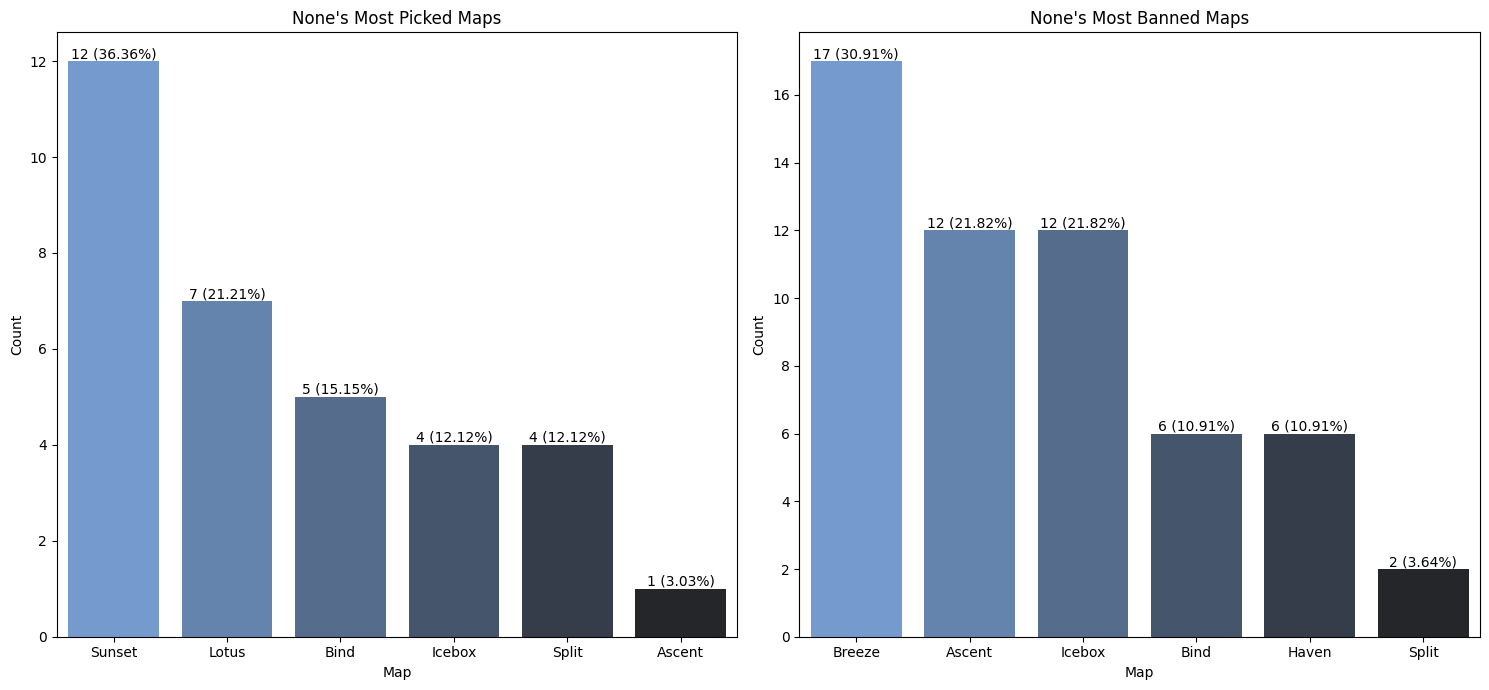

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
colors = sns.dark_palette("#69d", reverse=True)

sns.barplot(x='Map', y='Count', data=top_picked, ax=axes[0], palette=colors)
axes[0].set_title(f"{picked_team}'s Most Picked Maps")
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Map')

# Add pick percentage on top of each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f} ({(p.get_height() / total_picks * 100):.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

sns.barplot(x='Map', y='Count', data=top_banned, ax=axes[1], palette=colors)
axes[1].set_title(f"{picked_team}'s Most Banned Maps")
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Map')
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

# Add ban percentage on top of each bar
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f} ({(p.get_height() / total_bans * 100):.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()